## Multivariate Regression

In [108]:
#import modules 
import pandas as pd
import numpy as np 
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [15]:
#import data
from olist.order import Order
data = Order().get_training_data()

### 1 - Center variables

Since variables `distance_seller_customer`, `delay_vs_expected` and `wait_time` have large values, we center those to the mean

In [21]:
data['wait_time'] = data['wait_time'] / data['wait_time'].mean()
data['delay_vs_expected'] = data['delay_vs_expected'] / data['delay_vs_expected'].mean()
data['distance_seller_customer'] = data['distance_seller_customer'] / data['distance_seller_customer'].mean()
data['price'] = data['price'] / data['price'].mean()
data['freight_value'] = data['freight_value'] / data['freight_value'].mean()

### 2 - Training Set

In [17]:
# Create training_set
x = data.drop(['order_id', 'dim_is_five_star', 'dim_is_one_star'], axis=1)
x['intercept'] = 1

In [18]:
# Create target variables
Y_five_star = data['dim_is_five_star']
Y_one_star = data['dim_is_one_star']

### 3 - Correlation matrix

In [51]:
# Compute correlation matrix
x.drop('intercept', axis=1).corr()

,wait_time,delay_vs_expected,number_of_products,number_of_sellers,price,freight_value,distance_seller_customer
wait_time,1.000000,0.707351,-0.019230,-0.040722,0.055901,0.167077,0.393310
delay_vs_expected,0.707351,1.000000,-0.013241,-0.017178,0.017075,0.024288,0.066503
number_of_products,-0.019230,-0.013241,1.000000,0.286233,0.153998,0.439731,-0.016674
number_of_sellers,-0.040722,-0.017178,0.286233,1.000000,0.042385,0.133496,-0.007524
price,0.055901,0.017075,0.153998,0.042385,1.000000,0.411600,0.079726
freight_value,0.167077,0.024288,0.439731,0.133496,0.411600,1.000000,0.313966
distance_seller_customer,0.393310,0.066503,-0.016674,-0.007524,0.079726,0.313966,1.000000


We find that variables `wait_time` and `delay_vs_expected` have the highest correlation coefficients (~0.7)

### 4 - Predict five stars

In [100]:
# Plot distribution plot per variable
def plot_kde_plot(df, variable, dimension):
    g = sns.FacetGrid(df, 
                      hue=dimension,
                      col=dimension)
    g.map(sns.kdeplot, variable);

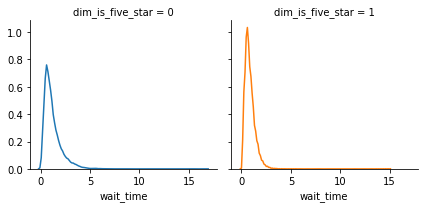

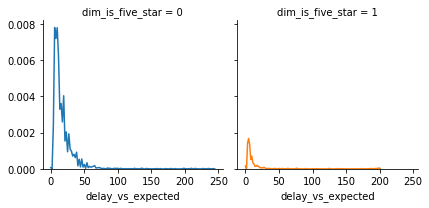

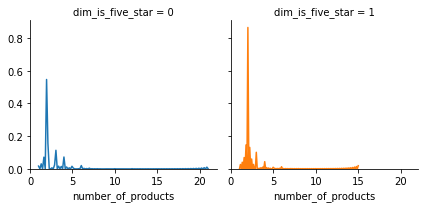

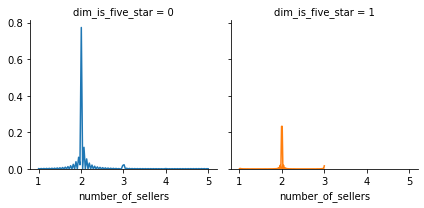

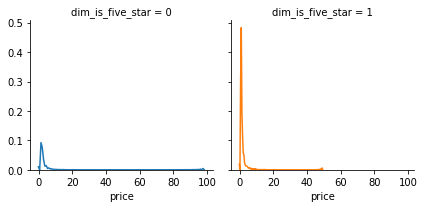

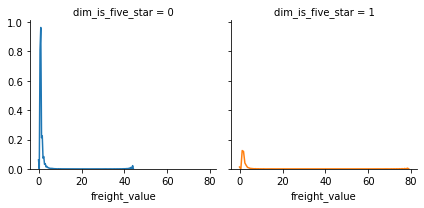

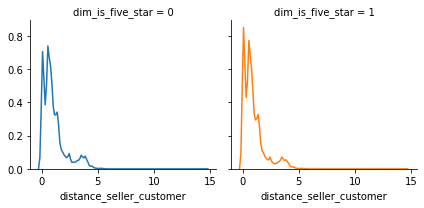

In [101]:
plot_variables = ['wait_time', 'delay_vs_expected', 'number_of_products',
                  'number_of_sellers', 'price', 'freight_value',
                  'distance_seller_customer']

for p in plot_variables:
    plot_kde_plot(x.join(Y_five_star), p, 'dim_is_five_star')

wait time, delay_vs_expected, number of sellers, price and freight_value seem to have different distributions

In [153]:
# Run logistic regression
logit_five_star = sm.Logit(Y_five_star, x).fit()
print(logit_five_star.summary())

Optimization terminated successfully.
         Current function value: 0.637310
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:       dim_is_five_star   No. Observations:                96510
Model:                          Logit   Df Residuals:                    96502
Method:                           MLE   Df Model:                            7
Date:                Wed, 30 Oct 2019   Pseudo R-squ.:                 0.05894
Time:                        16:42:20   Log-Likelihood:                -61507.
converged:                       True   LL-Null:                       -65359.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
wait_time                   -0.6961      0.015    -45.057      0.000      -0.726

We notice that number of sellers, wait_time and number of products are negatively correlated with the target five_star

In [126]:
# Output confusion matrix
logit_five_star.pred_table()

array([[10415., 29253.],
       [ 4768., 52074.]])

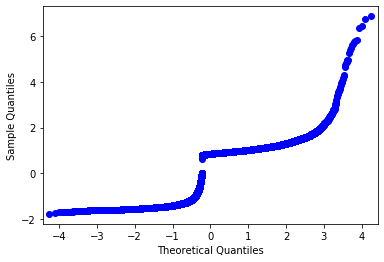

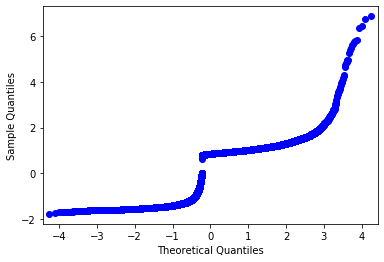

In [154]:
# Plot qqplot
sm.graphics.qqplot(logit_five_star.resid_dev)

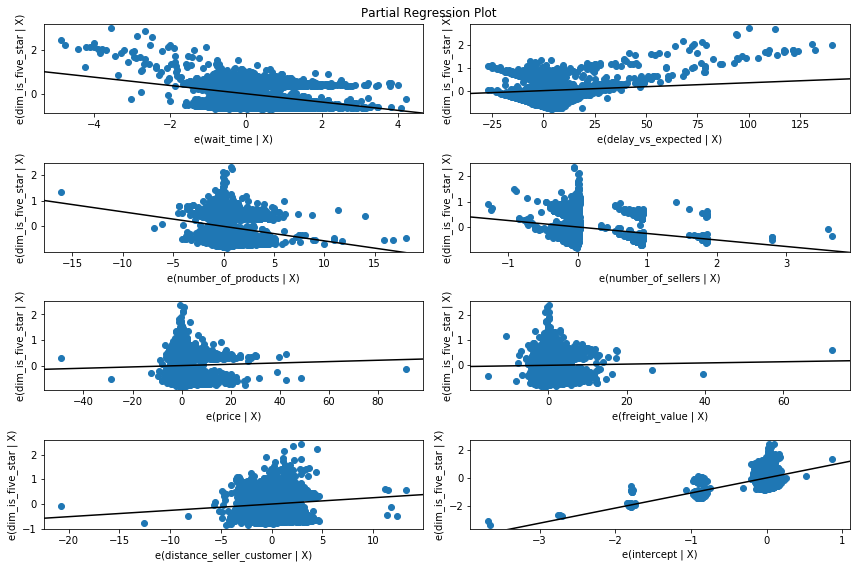

In [197]:
# Plot residuals
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(logit_five_star, fig=fig)

### 5 - Predict one star

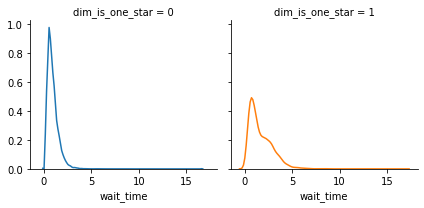

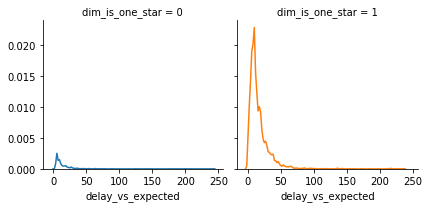

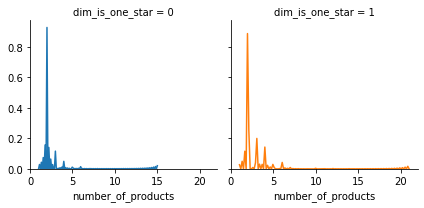

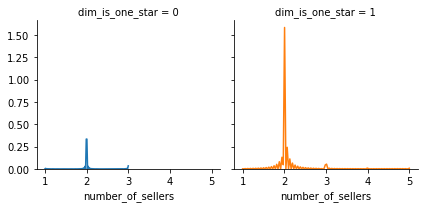

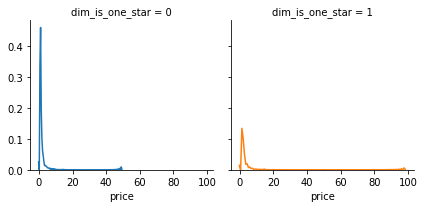

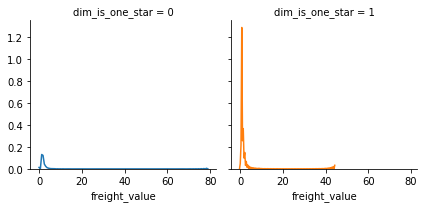

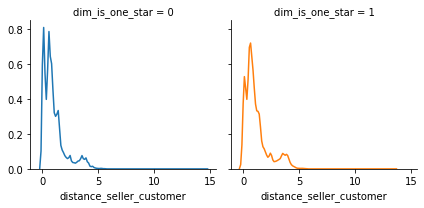

In [159]:
# Plot variables
for p in plot_variables:
    plot_kde_plot(x.join(Y_one_star), p, 'dim_is_one_star')

In [185]:
# Run logistic regression
logit_one_star = sm.Logit(Y_one_star, x).fit()
print(logit_one_star.summary())

Optimization terminated successfully.
         Current function value: 0.279554
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:        dim_is_one_star   No. Observations:                96510
Model:                          Logit   Df Residuals:                    96502
Method:                           MLE   Df Model:                            7
Date:                Wed, 30 Oct 2019   Pseudo R-squ.:                  0.1436
Time:                        17:00:41   Log-Likelihood:                -26980.
converged:                       True   LL-Null:                       -31503.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
wait_time                    0.9423      0.022     42.673      0.000       0.899

In [186]:
# Output confusion matrix
logit_one_star.pred_table()

array([[86110.,   690.],
       [ 8301.,  1409.]])

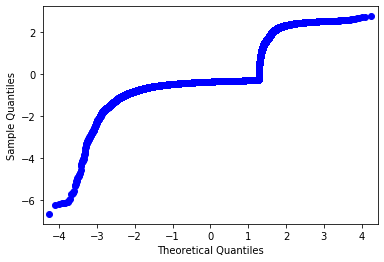

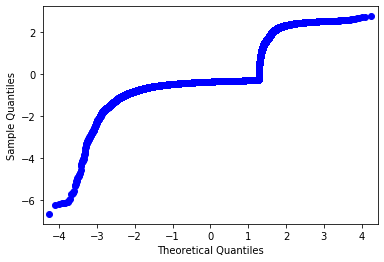

In [187]:
# Plot qqplot
sm.graphics.qqplot(logit_one_star.resid_dev)

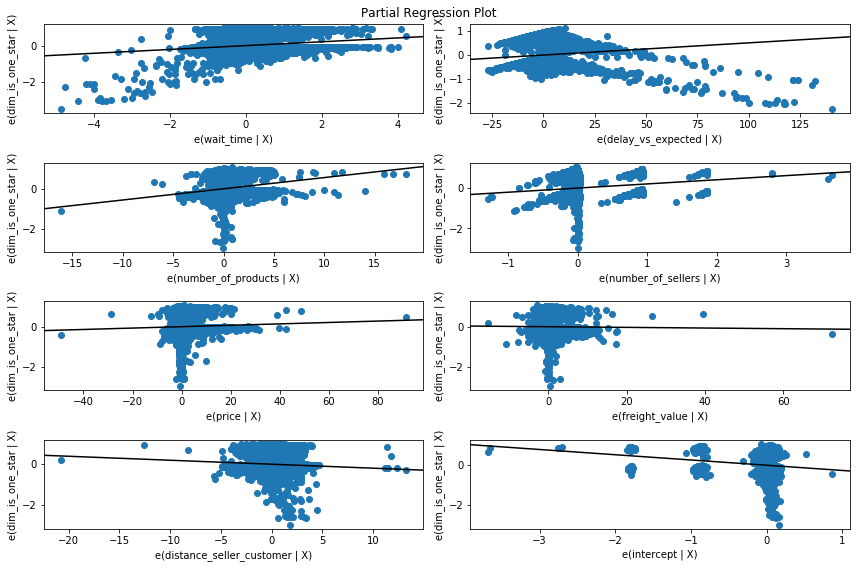

In [198]:
# Plot residuals
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(logit_one_star, fig=fig)